In [292]:
import pandas as pd

In [293]:
df = pd.read_csv('IPL 2024 Deliveries.csv')

In [294]:
df.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202401,2024,1,22-Mar-24,"MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,NaN,NaN,NaN
1,202401,2024,1,22-Mar-24,"MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,NaN,NaN,NaN
2,202401,2024,1,22-Mar-24,"MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN
3,202401,2024,1,22-Mar-24,"MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN
4,202401,2024,1,22-Mar-24,"MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN


In [295]:
df = df.drop(columns=['match_id'])

df['batting_team'] = df['batting_team'].replace('RCB', 'Royal Challengers Bangalore')
df['bowling_team'] = df['bowling_team'].replace('RCB', 'Royal Challengers Bangalore')

df['batting_team'] = df['batting_team'].replace('SRH', 'Sunrisers Hyderabad')
df['bowling_team'] = df['bowling_team'].replace('SRH', 'Sunrisers Hyderabad')

df['batting_team'] = df['batting_team'].replace('LSG', 'Lucknow Super Giants')
df['bowling_team'] = df['bowling_team'].replace('LSG', 'Lucknow Super Giants')

df['batting_team'] = df['batting_team'].replace('CSK', 'Chennai Super Kings')
df['bowling_team'] = df['bowling_team'].replace('CSK', 'Chennai Super Kings')

df['batting_team'] = df['batting_team'].replace('MI', 'Mumbai Indians')
df['bowling_team'] = df['bowling_team'].replace('MI', 'Mumbai Indians')

df['batting_team'] = df['batting_team'].replace('KKR', 'Kolkata Knight Riders')
df['bowling_team'] = df['bowling_team'].replace('KKR', 'Kolkata Knight Riders')

df['batting_team'] = df['batting_team'].replace('DC', 'Delhi Capitals')
df['bowling_team'] = df['bowling_team'].replace('DC', 'Delhi Capitals')

df['batting_team'] = df['batting_team'].replace('RR', 'Rajasthan Royals')
df['bowling_team'] = df['bowling_team'].replace('RR', 'Rajasthan Royals')

df['batting_team'] = df['batting_team'].replace('PBKS', 'Punjab Kings')
df['bowling_team'] = df['bowling_team'].replace('PBKS', 'Punjab Kings')

df['batting_team'] = df['batting_team'].replace('GT', 'Gujarat Titans')
df['bowling_team'] = df['bowling_team'].replace('GT', 'Gujarat Titans')


In [296]:
df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Delhi Capitals', 'Punjab Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Gujarat Titans', 'Mumbai Indians'], dtype=object)

In [297]:
df['bowling_team'].unique()

array(['Chennai Super Kings', 'Royal Challengers Bangalore',
       'Punjab Kings', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Kolkata Knight Riders', 'Lucknow Super Giants',
       'Rajasthan Royals', 'Mumbai Indians', 'Gujarat Titans'],
      dtype=object)

In [298]:
#Number of balls each team batted (excluding wides and no balls)
dfg = df[df['wide'] == 0]
dfg = dfg[dfg['noballs'] == 0]
dfg.groupby('batting_team').size().sort_values(ascending=False)

batting_team
Sunrisers Hyderabad            1823
Rajasthan Royals               1747
Royal Challengers Bangalore    1732
Chennai Super Kings            1648
Lucknow Super Giants           1644
Punjab Kings                   1624
Mumbai Indians                 1608
Delhi Capitals                 1576
Kolkata Knight Riders          1495
Gujarat Titans                 1405
dtype: int64

In [299]:
#Number of balls each team batted including wides and no balls
df.groupby('batting_team').size().sort_values(ascending=False)

batting_team
Sunrisers Hyderabad            1914
Rajasthan Royals               1824
Royal Challengers Bangalore    1811
Lucknow Super Giants           1719
Chennai Super Kings            1717
Punjab Kings                   1687
Mumbai Indians                 1685
Delhi Capitals                 1637
Kolkata Knight Riders          1588
Gujarat Titans                 1471
dtype: int64

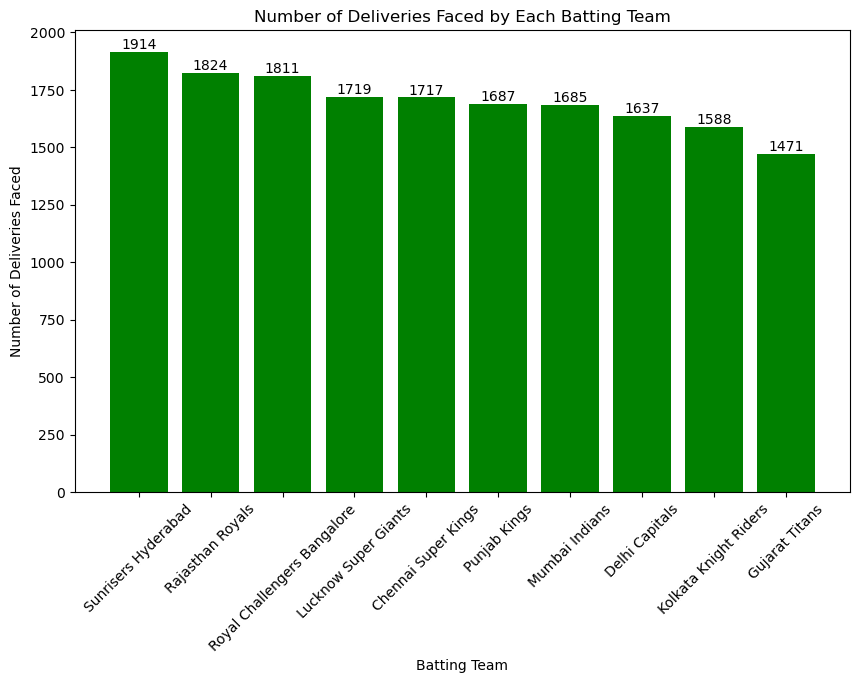

In [300]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.bar(df.groupby('batting_team').size().sort_values(ascending=False).index, df.groupby('batting_team').size().sort_values(ascending=False).values, color = 'green')
plt.xlabel('Batting Team')
plt.ylabel('Number of Deliveries Faced')
plt.title('Number of Deliveries Faced by Each Batting Team')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.show()

In [301]:
#Number of balls each team batted in first innings
dfi = df[df['innings'] == 1]
dfi = dfi[dfi['wide'] == 0]
dfi = dfi[dfi['noballs'] == 0]
dfi.groupby('batting_team').size().sort_values(ascending=False)

batting_team
Sunrisers Hyderabad            1188
Royal Challengers Bangalore    1080
Kolkata Knight Riders          1056
Chennai Super Kings             960
Lucknow Super Giants            960
Delhi Capitals                  840
Gujarat Titans                  702
Mumbai Indians                  600
Rajasthan Royals                600
Punjab Kings                    480
dtype: int64

In [302]:
#Number of balls each team batted in second innings
dft = df[df['innings'] == 2]
dft = dft[dft['wide'] == 0]
dft = dft[dft['noballs'] == 0]
dft.groupby('batting_team').size().sort_values(ascending=False)

batting_team
Rajasthan Royals               1147
Punjab Kings                   1144
Mumbai Indians                 1008
Delhi Capitals                  736
Gujarat Titans                  703
Chennai Super Kings             688
Lucknow Super Giants            684
Royal Challengers Bangalore     652
Sunrisers Hyderabad             635
Kolkata Knight Riders           439
dtype: int64

In [303]:
#Number of balls each team bowled
dfg.groupby('bowling_team').size().sort_values(ascending=False)

bowling_team
Sunrisers Hyderabad            1799
Rajasthan Royals               1783
Royal Challengers Bangalore    1710
Punjab Kings                   1665
Chennai Super Kings            1640
Delhi Capitals                 1640
Mumbai Indians                 1611
Kolkata Knight Riders          1578
Lucknow Super Giants           1566
Gujarat Titans                 1310
dtype: int64

In [304]:
#Number of balls each team bowled (including wides and no balls)
df.groupby('bowling_team').size().sort_values(ascending=False)

bowling_team
Sunrisers Hyderabad            1882
Rajasthan Royals               1860
Royal Challengers Bangalore    1795
Punjab Kings                   1734
Delhi Capitals                 1727
Chennai Super Kings            1722
Mumbai Indians                 1699
Kolkata Knight Riders          1649
Lucknow Super Giants           1637
Gujarat Titans                 1348
dtype: int64

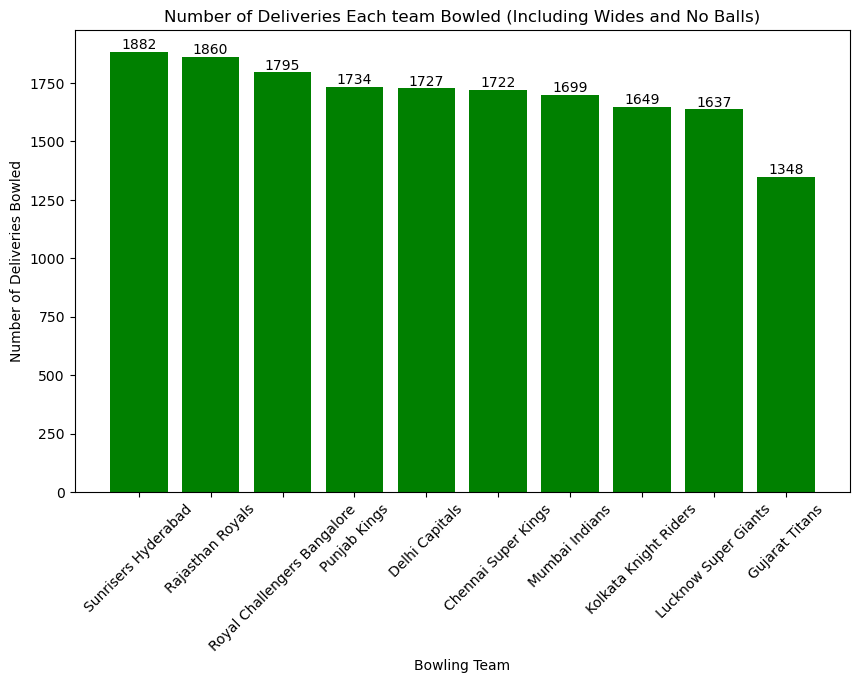

In [305]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df.groupby('bowling_team').size().sort_values(ascending=False).index, df.groupby('bowling_team').size().sort_values(ascending=False).values, color = 'green')
plt.xlabel('Bowling Team')
plt.ylabel('Number of Deliveries Bowled')
plt.title('Number of Deliveries Each team Bowled (Including Wides and No Balls)')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.show()

In [306]:
#Number of matches played by venue
df.groupby('match_no')['venue'].first().value_counts()

venue
MA Chidambaram Stadium, Chennai                                                   9
Narendra Modi Stadium, Ahmedabad                                                  8
Eden Gardens, Kolkata                                                             7
M.Chinnaswamy Stadium, Bengaluru                                                  7
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow             7
Wankhede Stadium, Mumbai                                                          7
Rajiv Gandhi International Stadium, Hyderabad                                     6
Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur, Chandigarh    5
Sawai Mansingh Stadium, Jaipur                                                    5
Arun Jaitley Stadium, Delhi                                                       5
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam                2
Himachal Pradesh Cricket Association Stadium, Dharamsala              

In [307]:
#10 players who faced the most deliveries
df.groupby('striker').size().sort_values(ascending=False).head(10)

striker
Kohli            496
Gaikwad          425
Riyan Parag      406
Rahul            398
Sai Sudharsan    387
Samson           361
Head             306
Pant             296
Shubman Gill     295
Pooran           294
dtype: int64

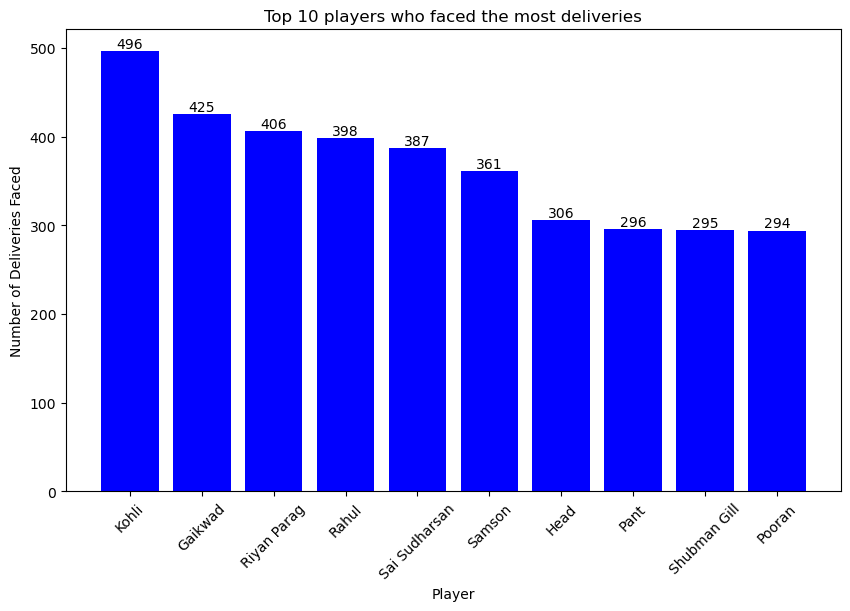

In [308]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df.groupby('striker').size().sort_values(ascending=False).head(10).index, df.groupby('striker').size().sort_values(ascending=False).head(10).values, color = 'blue')
plt.xlabel('Player')
plt.ylabel('Number of Deliveries Faced')
plt.title('Top 10 players who faced the most deliveries')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.show()

In [309]:
#10 players who bowled the most deliveries
df.groupby('bowler').size().sort_values(ascending=False).head(10)

bowler
Cummins        375
Chahal         362
Bhuvneshwar    353
Siraj          346
Ashwin         346
Avesh Khan     344
Narine         334
Boult          333
T Natarajan    330
Bumrah         328
dtype: int64

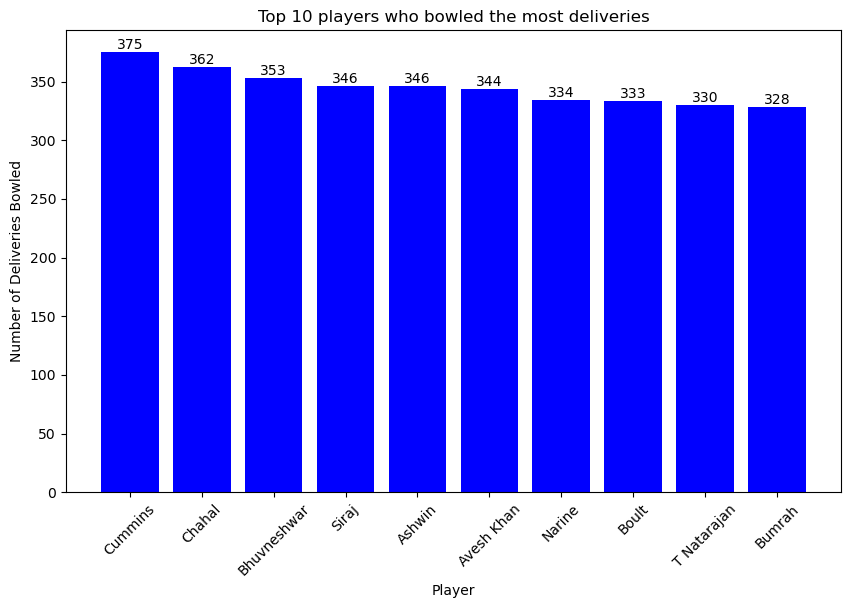

In [310]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df.groupby('bowler').size().sort_values(ascending=False).head(10).index, df.groupby('bowler').size().sort_values(ascending=False).head(10).values, color = 'blue')
plt.xlabel('Player')
plt.ylabel('Number of Deliveries Bowled')
plt.title('Top 10 players who bowled the most deliveries')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.show()

In [311]:
#Which batsmen scored the most runs
df.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False).head(10)

striker
Kohli              741
Gaikwad            583
Riyan Parag        573
Head               567
Samson             531
Sai Sudharsan      527
Rahul              520
Pooran             499
Narine             488
Abhishek Sharma    484
Name: runs_of_bat, dtype: int64

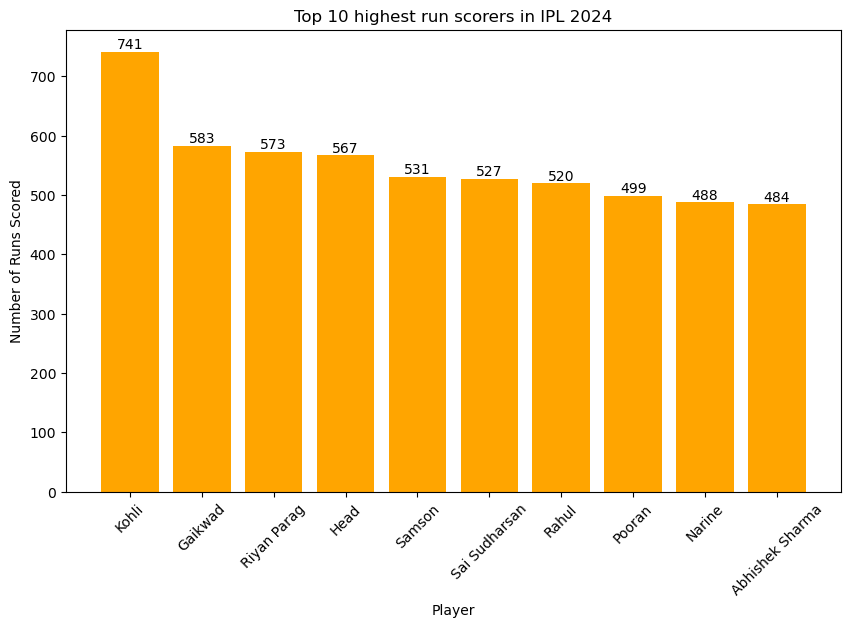

In [312]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False).head(10).index, df.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False).head(10).values, color = 'orange')
plt.xlabel('Player')
plt.ylabel('Number of Runs Scored')
plt.title('Top 10 highest run scorers in IPL 2024')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.show()

In [313]:
#Which bowlers took the most wickets including runouts and obstructing the field
df['wt'] = df['wicket_type'].apply(lambda x: 0 if pd.isna(x) else 1)
df.groupby('bowler')['wt'].sum().sort_values(ascending=False).head(10)

bowler
Harshal Patel     30
Avesh Khan        22
Mukesh Kumar      22
Chakaravarthy     21
Bumrah            21
Harshit Rana      20
Arshdeep Singh    20
Starc             20
T Natarajan       20
Russell           19
Name: wt, dtype: int64

In [314]:
#Excluding runouts and obstructing the field
df2 = df[df['wicket_type'] != 'runout']
df2 = df2[df2['wicket_type'] != 'obstructing the field']
df2.groupby('bowler')['wt'].sum().sort_values(ascending=False).head(10)

bowler
Harshal Patel     24
Chakaravarthy     21
Bumrah            20
Harshit Rana      19
T Natarajan       19
Russell           19
Arshdeep Singh    19
Avesh Khan        19
Cummins           18
Chahal            18
Name: wt, dtype: int64

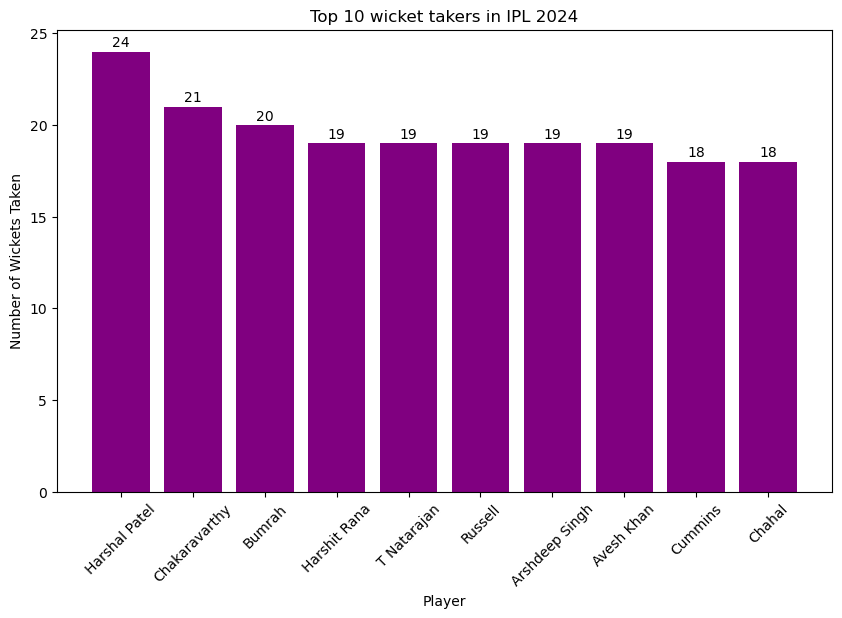

In [315]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df2.groupby('bowler')['wt'].sum().sort_values(ascending=False).head(10).index, df2.groupby('bowler')['wt'].sum().sort_values(ascending=False).head(10).values, color = 'purple')
plt.xlabel('Player')
plt.ylabel('Number of Wickets Taken')
plt.title('Top 10 wicket takers in IPL 2024')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.show()

In [316]:
#Which teams played the most matches
unique_matches = df[['match_no', 'batting_team']].drop_duplicates()
unique_matches['team'] = unique_matches['batting_team']
unique_matches['team'].value_counts().sort_values(ascending = False)

team
Sunrisers Hyderabad            16
Royal Challengers Bangalore    15
Rajasthan Royals               15
Chennai Super Kings            14
Delhi Capitals                 14
Punjab Kings                   14
Kolkata Knight Riders          14
Lucknow Super Giants           14
Mumbai Indians                 14
Gujarat Titans                 12
Name: count, dtype: int64

In [317]:
#Which bowlers conceded the most extras
df.groupby('bowler')['extras'].sum().sort_values(ascending=False).head(10)

bowler
Gerald Coetzee      38
Yash Dayal          37
Starc               36
Khaleel Ahmed       35
Harshal Patel       34
Siraj               34
Bhuvneshwar         33
Tushar Deshpande    33
Arshdeep Singh      31
Ashwin              30
Name: extras, dtype: int64

In [318]:
#Which bowlers conceded the most wides
df.groupby('bowler')['wide'].sum().sort_values(ascending=False).head(10)

bowler
Siraj               22
Arshdeep Singh      22
T Natarajan         22
Harshal Patel       20
Tushar Deshpande    19
Khaleel Ahmed       18
Yash Dayal          17
Starc               16
Ashwin              16
Ishant              16
Name: wide, dtype: int64

In [319]:
#Which bowlers conceded the most legbyes
df.groupby('bowler')['legbyes'].sum().sort_values(ascending=False).head(10)

bowler
Bhuvneshwar         9
Gerald Coetzee      8
Rabada              8
Russell             7
Khaleel Ahmed       7
Yash Dayal          6
Siraj               6
Tushar Deshpande    5
Arshdeep Singh      5
Ferguson            5
Name: legbyes, dtype: int64

In [320]:
#Which bowlers conceded the most byes
df.groupby('bowler')['byes'].sum().sort_values(ascending=False).head(10)

bowler
Khaleel Ahmed       3
Mustafizur          3
Narine              2
Shahbaz Ahmed       2
Tushar Deshpande    2
Siraj               2
Harshal Patel       2
Theekshana          1
Sam Curran          1
Sandeep Sharma      1
Name: byes, dtype: int64

In [321]:
#Which bowlers bowled the most noballs
df.groupby('bowler')['noballs'].sum().sort_values(ascending=False).head(10)

bowler
Vaibhav Arora       5
Bumrah              4
Mustafizur          4
Mukesh Kumar        3
M Siddharth         3
Ferguson            3
Thakur              3
Naveen-ul-Haq       3
Tushar Deshpande    2
Chakaravarthy       2
Name: noballs, dtype: int64

In [322]:
#Which fielder took the most catches
df3 = df[df['wicket_type'] == 'caught']
df3.groupby('fielder').size().sort_values(ascending=False).head(10)

fielder
Rahul            15
Axar             13
Jitesh Sharma    13
Philip Salt      12
Dhruv Jurel      11
Pant             11
Shreyas Iyer     10
Dhoni            10
Mitchell          9
Tilak Varma       9
dtype: int64

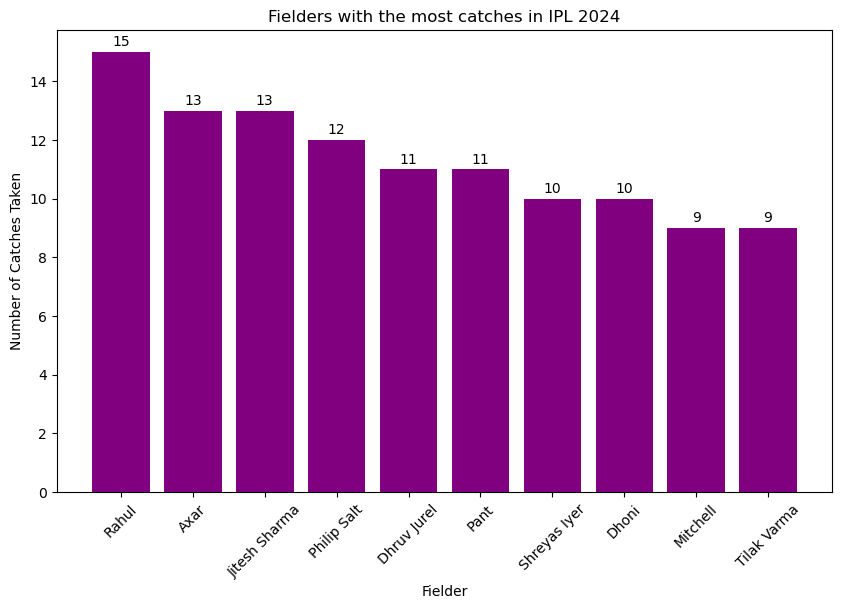

In [323]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df3.groupby('fielder').size().sort_values(ascending=False).head(10).index, df3.groupby('fielder').size().sort_values(ascending=False).head(10).values, color = 'purple')
plt.xlabel('Fielder')
plt.ylabel('Number of Catches Taken')
plt.title('Fielders with the most catches in IPL 2024')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.show()

In [324]:
#Which fielders contributed to the most runouts
df4 = df[df['wicket_type'] == 'runout']
runout_counts = {}
for index, row in df4.iterrows():
    fielders = row['fielder'].split('/')
    for fielder in fielders:
        fielder = fielder.strip()
        if fielder in runout_counts:
            runout_counts[fielder] += 1
        else:
            runout_counts[fielder] = 1

pd.Series(runout_counts).sort_values(ascending=False).head(10)

Harshal Patel    4
Kohli            3
Mukesh Kumar     3
Ishan Kishan     3
Saha             3
Philip Salt      3
Sumit Kumar      2
Samson           2
Avesh Khan       2
Green            2
dtype: int64

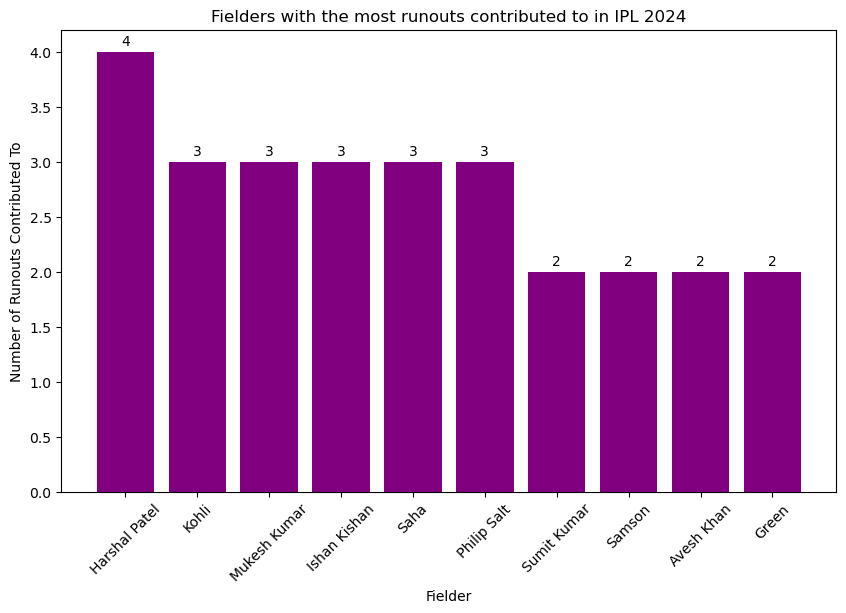

In [325]:
plt.figure(figsize=(10, 6))
bars = plt.bar(pd.Series(runout_counts).sort_values(ascending=False).head(10).index, pd.Series(runout_counts).sort_values(ascending=False).head(10).values, color = 'purple')
plt.xlabel('Fielder')
plt.ylabel('Number of Runouts Contributed To')
plt.title('Fielders with the most runouts contributed to in IPL 2024')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.03, int(yval), ha='center', va='bottom')
plt.show()

In [326]:
#Which fielders took the most wickets
cc = {}
for index, row in df.iterrows():
    if pd.notna(row['fielder']):
        fielders = row['fielder'].split('/')
        for fielder in fielders:
            fielder = fielder.strip()
            if fielder in cc:
                cc[fielder] += 1
            else:
                cc[fielder] = 1

pd.Series(cc).sort_values(ascending=False).head(10)

Rahul            17
Pant             17
Jitesh Sharma    15
Philip Salt      15
Axar             13
Ishan Kishan     12
Dhruv Jurel      11
Kohli            11
Klaasen          11
Shreyas Iyer     11
dtype: int64

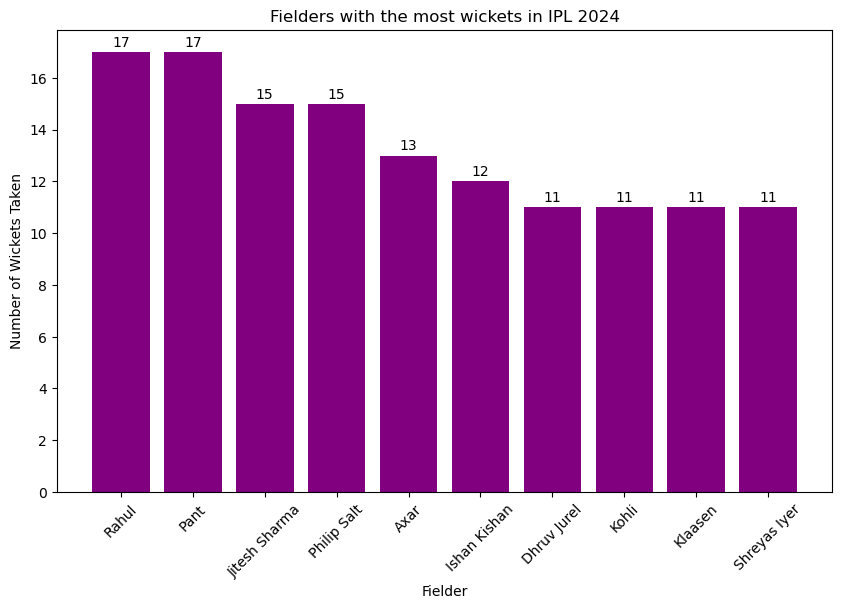

In [327]:
plt.figure(figsize=(10, 6))
bars = plt.bar(pd.Series(cc).sort_values(ascending=False).head(10).index, pd.Series(cc).sort_values(ascending=False).head(10).values, color = 'purple')
plt.xlabel('Fielder')
plt.ylabel('Number of Wickets Taken')
plt.title('Fielders with the most wickets in IPL 2024')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.show()

In [328]:
#Which team scored the most runs
df['total_runs'] = df['runs_of_bat'] + df['extras']
df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

batting_team
Sunrisers Hyderabad            3047
Royal Challengers Bangalore    2923
Kolkata Knight Riders          2662
Rajasthan Royals               2639
Delhi Capitals                 2569
Mumbai Indians                 2567
Chennai Super Kings            2522
Punjab Kings                   2482
Lucknow Super Giants           2474
Gujarat Titans                 2038
Name: total_runs, dtype: int64

In [329]:
#Average number of runs scored per ball per team
df['total_runs'] = df['runs_of_bat'] + df['extras']
df_legitimate = df[(df['wide'] == 0) & (df['noballs'] == 0)]
(df.groupby('batting_team')['total_runs'].sum() / df_legitimate.groupby('batting_team').size()).sort_values(ascending=False)

batting_team
Kolkata Knight Riders          1.780602
Royal Challengers Bangalore    1.687644
Sunrisers Hyderabad            1.671421
Delhi Capitals                 1.630076
Mumbai Indians                 1.596393
Chennai Super Kings            1.530340
Punjab Kings                   1.528325
Rajasthan Royals               1.510590
Lucknow Super Giants           1.504866
Gujarat Titans                 1.450534
dtype: float64

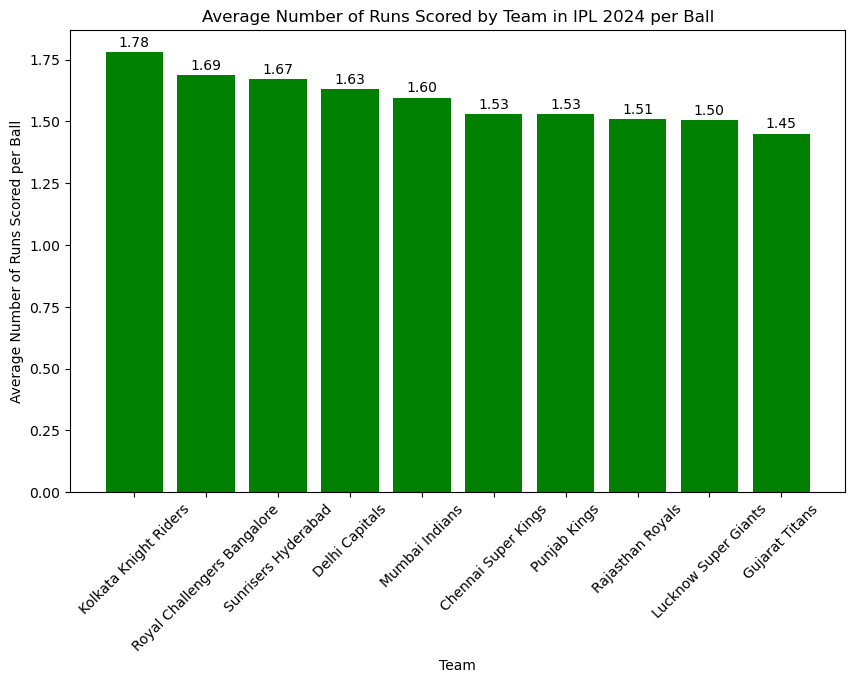

In [330]:
plt.figure(figsize=(10, 6))
ac = (df.groupby('batting_team')['total_runs'].sum() / df_legitimate.groupby('batting_team').size()).sort_values(ascending=False)
bars = plt.bar(ac.index, ac.values, color = 'green')
plt.xlabel('Team')
plt.ylabel('Average Number of Runs Scored per Ball')
plt.title('Average Number of Runs Scored by Team in IPL 2024 per Ball')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01,  f'{yval:.2f}', ha='center', va='bottom')
plt.show()

In [331]:
# Players with the highest strike rates having faced over 50 deliveries
df['total_runs'] = df['runs_of_bat'] + df['extras']
ld = df_legitimate.groupby('striker').size()
ld = ld[ld >= 50]
((df.groupby('striker')['runs_of_bat'].sum() / ld) * 100).sort_values(ascending=False).head(10)

striker
Fraser-McGurk      237.410072
Dhoni              223.611111
Abhishek Sharma    205.957447
Ramandeep Singh    204.918033
Tristan Stubbs     192.857143
Head               192.857143
Russell            189.743590
Karthik            188.439306
Philip Salt        185.106383
Lomror             183.823529
dtype: float64

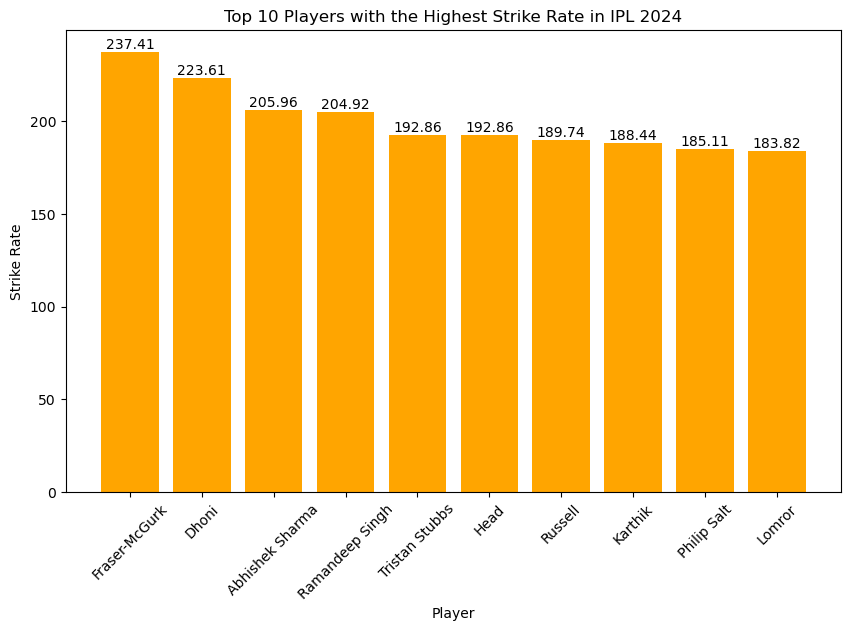

In [332]:
plt.figure(figsize=(10, 6))
bars = plt.bar(((df.groupby('striker')['runs_of_bat'].sum() / ld) * 100).sort_values(ascending=False).head(10).index, ((df.groupby('striker')['runs_of_bat'].sum() / ld) * 100).sort_values(ascending=False).head(10).values, color='orange')
plt.xlabel('Player')
plt.ylabel('Strike Rate')
plt.title('Top 10 Players with the Highest Strike Rate in IPL 2024')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom')
plt.show()

In [333]:
#Which team scored the most runs batting first
df['total_runs'] = df['runs_of_bat'] + df['extras']
dfii = df[df['innings'] == 1]
dfii.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

batting_team
Sunrisers Hyderabad            1991
Kolkata Knight Riders          1879
Royal Challengers Bangalore    1753
Chennai Super Kings            1503
Lucknow Super Giants           1440
Delhi Capitals                 1426
Gujarat Titans                 1033
Mumbai Indians                  874
Rajasthan Royals                857
Punjab Kings                    679
Name: total_runs, dtype: int64

In [334]:
#Average number of runs a team scores batting first (Exclude Match 51 as the batting team didnt bat the full 20 overs)
dfiii = dfii[dfii['match_no'] != 51]
(dfiii.groupby('batting_team')['total_runs'].sum()/dfiii.groupby('batting_team')['match_no'].nunique()).sort_values(ascending=False)

batting_team
Kolkata Knight Riders          213.750000
Delhi Capitals                 203.714286
Sunrisers Hyderabad            199.100000
Royal Challengers Bangalore    194.777778
Chennai Super Kings            187.875000
Lucknow Super Giants           180.000000
Mumbai Indians                 174.800000
Gujarat Titans                 172.166667
Rajasthan Royals               171.400000
Punjab Kings                   169.750000
dtype: float64

In [335]:
#Which team scored the most runs batting 2nd
df['total_runs'] = df['runs_of_bat'] + df['extras']
dftt = df[df['innings'] == 2]
dftt.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

batting_team
Punjab Kings                   1803
Rajasthan Royals               1782
Mumbai Indians                 1693
Royal Challengers Bangalore    1170
Delhi Capitals                 1143
Sunrisers Hyderabad            1056
Lucknow Super Giants           1034
Chennai Super Kings            1019
Gujarat Titans                 1005
Kolkata Knight Riders           783
Name: total_runs, dtype: int64

In [336]:
#Which bowlers conceded the most runs
df.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).head(10)

bowler
Cummins           571
Bhuvneshwar       551
Chahal            548
Avesh Khan        531
Arshdeep Singh    512
Siraj             503
Khaleel Ahmed     488
Harshal Patel     484
Yash Dayal        471
Ashwin            469
Name: total_runs, dtype: int64

In [337]:
#Which bowlers conceded the least runs per ball
ld = df_legitimate.groupby('bowler').size()
ld = ld[ld >= 50]
((df.groupby('bowler')['total_runs'].sum() / ld).sort_values(ascending=True)).head(10)

bowler
Bumrah           1.096463
Narine           1.139394
Santner          1.185185
Livingstone      1.194444
Mayank Yadav     1.205479
Theekshana       1.216667
Axar             1.287879
Krunal Pandya    1.303030
Jadeja           1.315603
Pathirana        1.318182
dtype: float64

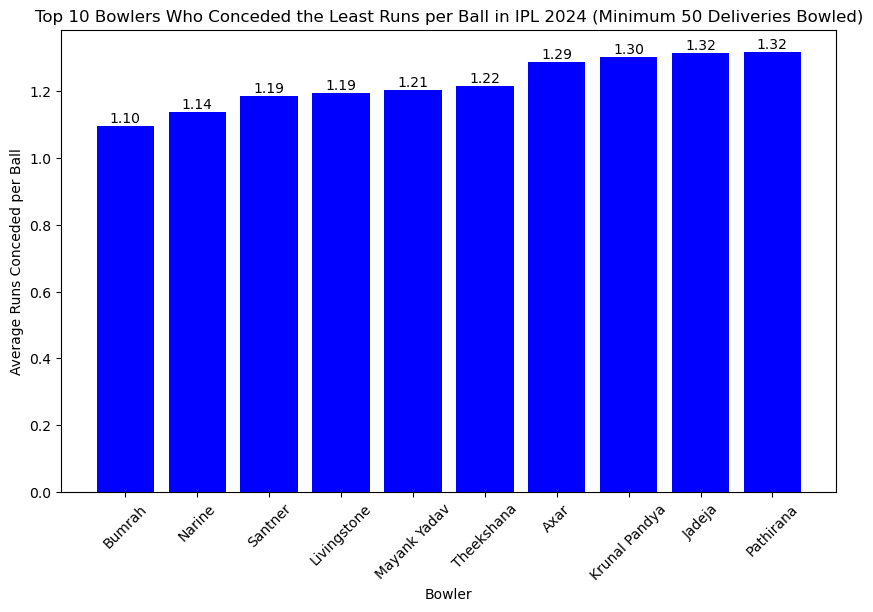

In [338]:
plt.figure(figsize=(10, 6))
bars = plt.bar(((df.groupby('bowler')['total_runs'].sum() / ld).sort_values(ascending=True)).head(10).index, ((df.groupby('bowler')['total_runs'].sum() / ld).sort_values(ascending=True)).head(10).values, color='blue')
plt.xlabel('Bowler')
plt.ylabel('Average Runs Conceded per Ball')
plt.title('Top 10 Bowlers Who Conceded the Least Runs per Ball in IPL 2024 (Minimum 50 Deliveries Bowled)')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.2f}', ha='center', va='bottom')
plt.show()

In [339]:
#Which bowlers conceded the most runs per ball
ld = df_legitimate.groupby('bowler').size()
ld = ld[ld >= 50]
((df.groupby('bowler')['total_runs'].sum() / ld).sort_values(ascending=False)).head(10)

bowler
Nortje            2.257576
Shepherd          2.250000
Marco Jansen      2.233333
Alzarri Joseph    2.120690
Markande          1.962121
Nitish Reddy      1.949367
Akash Madhwal     1.917431
Yash Thakur       1.892019
Anshul Kamboj     1.883333
Arshad Khan       1.868852
dtype: float64

In [340]:
#Which team conceded the least runs
df['total_runs'] = df['runs_of_bat'] + df['extras']
df.groupby('bowling_team')['total_runs'].sum().sort_values(ascending=True)

bowling_team
Gujarat Titans                 2100
Kolkata Knight Riders          2405
Chennai Super Kings            2412
Lucknow Super Giants           2516
Punjab Kings                   2607
Mumbai Indians                 2653
Rajasthan Royals               2655
Delhi Capitals                 2752
Royal Challengers Bangalore    2814
Sunrisers Hyderabad            3009
Name: total_runs, dtype: int64

In [341]:
#Which team conceded the least runs per ball on average
df_legitimate = df[(df['wide'] == 0) & (df['noballs'] == 0)]
(df.groupby('bowling_team')['total_runs'].sum() / df_legitimate.groupby('bowling_team').size()).sort_values(ascending=True)

bowling_team
Chennai Super Kings            1.470732
Rajasthan Royals               1.489063
Kolkata Knight Riders          1.524081
Punjab Kings                   1.565766
Gujarat Titans                 1.603053
Lucknow Super Giants           1.606641
Royal Challengers Bangalore    1.645614
Mumbai Indians                 1.646803
Sunrisers Hyderabad            1.672596
Delhi Capitals                 1.678049
dtype: float64

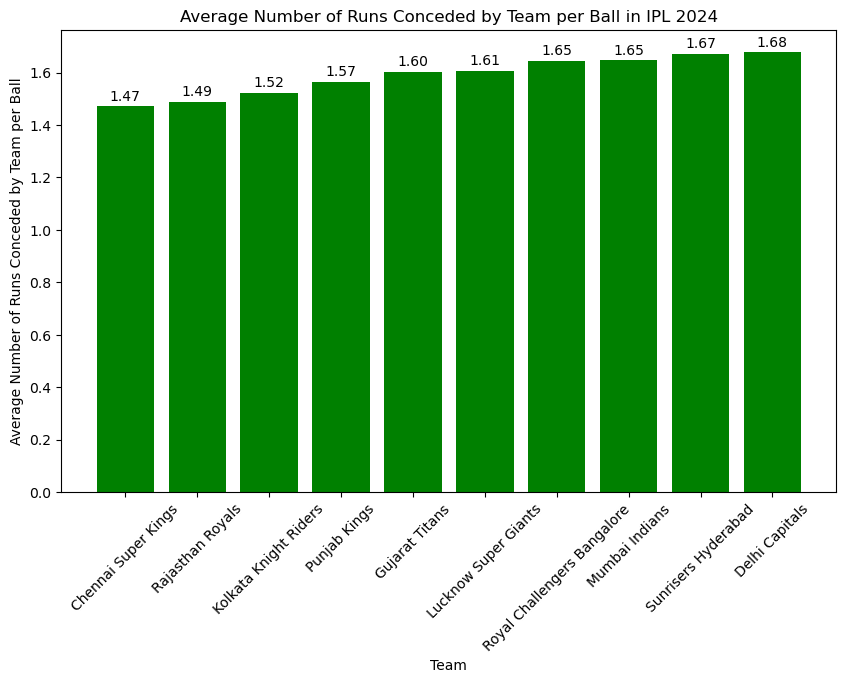

In [342]:
plt.figure(figsize=(10, 6))
bars = plt.bar((df.groupby('bowling_team')['total_runs'].sum() / df_legitimate.groupby('bowling_team').size()).sort_values(ascending=True).index, (df.groupby('bowling_team')['total_runs'].sum() / df_legitimate.groupby('bowling_team').size()).sort_values(ascending=True).values, color = 'green')
plt.xlabel('Team')
plt.ylabel('Average Number of Runs Conceded by Team per Ball')
plt.title('Average Number of Runs Conceded by Team per Ball in IPL 2024')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')
plt.show()

In [343]:
#Which team conceded the least runs bowling first
dfii.groupby('bowling_team')['total_runs'].sum().sort_values(ascending=True)

bowling_team
Kolkata Knight Riders           767
Chennai Super Kings            1089
Gujarat Titans                 1092
Lucknow Super Giants           1162
Sunrisers Hyderabad            1169
Royal Challengers Bangalore    1209
Delhi Capitals                 1399
Mumbai Indians                 1811
Rajasthan Royals               1821
Punjab Kings                   1916
Name: total_runs, dtype: int64

In [344]:
#Which team conceded the least runs bowling second
dftt.groupby('bowling_team')['total_runs'].sum().sort_values(ascending=True)

bowling_team
Punjab Kings                    691
Rajasthan Royals                834
Mumbai Indians                  842
Gujarat Titans                 1008
Chennai Super Kings            1323
Delhi Capitals                 1353
Lucknow Super Giants           1354
Royal Challengers Bangalore    1605
Kolkata Knight Riders          1638
Sunrisers Hyderabad            1840
Name: total_runs, dtype: int64

In [345]:
#Which team won the most games in the regular season
df['total_runs'] = df['runs_of_bat'] + df['extras']
df3 = df[df['match_no'] <= 70]
runs_summary = df3.groupby(['match_no', 'innings', 'batting_team'])['total_runs'].sum().reset_index()

runs_pivot = runs_summary.pivot(index='match_no', columns='innings', values='total_runs').reset_index()
runs_pivot.columns = ['match_no', 'team1_runs', 'team2_runs']

match_teams = df[['match_no', 'batting_team', 'innings']].drop_duplicates()
team1 = match_teams[match_teams['innings'] == 1][['match_no', 'batting_team']].rename(columns={'batting_team': 'team1'})
team2 = match_teams[match_teams['innings'] == 2][['match_no', 'batting_team']].rename(columns={'batting_team': 'team2'})

results = runs_pivot.merge(team1, on='match_no').merge(team2, on='match_no')

def determine_winner(row):
    if row['team2_runs'] > row['team1_runs']:
        return row['team2']
    else:
        return row['team1']

results.apply(determine_winner, axis=1).value_counts()

Kolkata Knight Riders          9
Rajasthan Royals               8
Sunrisers Hyderabad            8
Chennai Super Kings            7
Royal Challengers Bangalore    7
Lucknow Super Giants           7
Delhi Capitals                 7
Punjab Kings                   5
Gujarat Titans                 5
Mumbai Indians                 4
Name: count, dtype: int64

In [346]:
#Which team won the most games in the playoffs
df['total_runs'] = df['runs_of_bat'] + df['extras']
df3 = df[df['match_no'] > 70]
runs_summary = df3.groupby(['match_no', 'innings', 'batting_team'])['total_runs'].sum().reset_index()

runs_pivot = runs_summary.pivot(index='match_no', columns='innings', values='total_runs').reset_index()
runs_pivot.columns = ['match_no', 'team1_runs', 'team2_runs']

match_teams = df[['match_no', 'batting_team', 'innings']].drop_duplicates()
team1 = match_teams[match_teams['innings'] == 1][['match_no', 'batting_team']].rename(columns={'batting_team': 'team1'})
team2 = match_teams[match_teams['innings'] == 2][['match_no', 'batting_team']].rename(columns={'batting_team': 'team2'})

results = runs_pivot.merge(team1, on='match_no').merge(team2, on='match_no')

results.apply(determine_winner, axis=1).value_counts()

Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: count, dtype: int64

In [347]:
#Which team won the most games overall
df['total_runs'] = df['runs_of_bat'] + df['extras']
runs_summary = df.groupby(['match_no', 'innings', 'batting_team'])['total_runs'].sum().reset_index()

runs_pivot = runs_summary.pivot(index='match_no', columns='innings', values='total_runs').reset_index()
runs_pivot.columns = ['match_no', 'team1_runs', 'team2_runs']

match_teams = df[['match_no', 'batting_team', 'innings']].drop_duplicates()
team1 = match_teams[match_teams['innings'] == 1][['match_no', 'batting_team']].rename(columns={'batting_team': 'team1'})
team2 = match_teams[match_teams['innings'] == 2][['match_no', 'batting_team']].rename(columns={'batting_team': 'team2'})

results = runs_pivot.merge(team1, on='match_no').merge(team2, on='match_no')
results.apply(determine_winner, axis=1).value_counts()

Kolkata Knight Riders          11
Rajasthan Royals                9
Sunrisers Hyderabad             9
Chennai Super Kings             7
Royal Challengers Bangalore     7
Lucknow Super Giants            7
Delhi Capitals                  7
Punjab Kings                    5
Gujarat Titans                  5
Mumbai Indians                  4
Name: count, dtype: int64

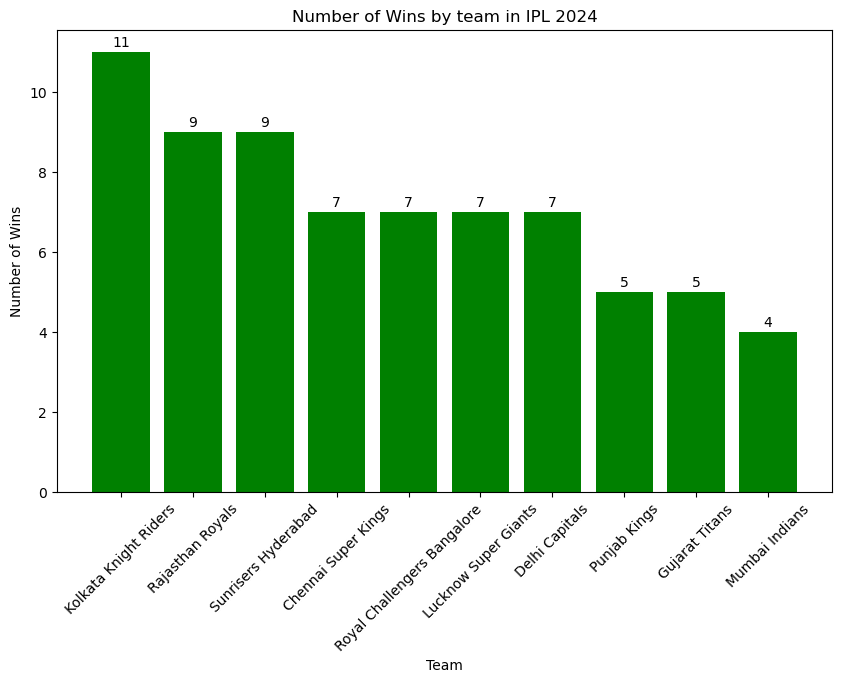

In [348]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results.apply(determine_winner, axis=1).value_counts().index, results.apply(determine_winner, axis=1).value_counts().values, color = 'green')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by team in IPL 2024')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')
plt.show()

In [349]:
#Which team won the final
df['total_runs'] = df['runs_of_bat'] + df['extras']
df3 = df[df['match_no'] == 74]
runs_summary = df3.groupby(['match_no', 'innings', 'batting_team'])['total_runs'].sum().reset_index()

runs_pivot = runs_summary.pivot(index='match_no', columns='innings', values='total_runs').reset_index()
runs_pivot.columns = ['match_no', 'team1_runs', 'team2_runs']

match_teams = df[['match_no', 'batting_team', 'innings']].drop_duplicates()
team1 = match_teams[match_teams['innings'] == 1][['match_no', 'batting_team']].rename(columns={'batting_team': 'team1'})
team2 = match_teams[match_teams['innings'] == 2][['match_no', 'batting_team']].rename(columns={'batting_team': 'team2'})

results = runs_pivot.merge(team1, on='match_no').merge(team2, on='match_no')
print(results.apply(determine_winner, axis=1).to_string(index=False))

Kolkata Knight Riders
